# xvector_kaldiモデルの主成分解析
512次元の各話者の平均x-vectorを主成分解析により2次元に圧縮  
これによりx-vectorが話者の特徴を捉えられているのか（似た声の人は値が似通る）を確認  

---  

jvsコーパスでx-vectorの主成分解析を行っていた論文 【[pdf](http://www.me.cs.scitec.kobe-u.ac.jp/~takigu/pdf/2022/yoshi-1-3P-15#:~:text=x%2Dvector%20%E3%81%AF%20%E8%A9%B1%E8%80%85,%E3%81%A6%E3%81%84%E3%82%8B%E3%81%A8%E8%80%83%E3%81%88%E3%82%89%E3%82%8C%E3%82%8B%EF%BC%8E)】  
主成分解析の仕方 【[サイト](https://corvus-window.com/python_pca/)】  

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


### データ読み込み

In [2]:
vecfile_path = "./data/NL_Xvector.csv"
idfile_path = "./data/id_and_NL.csv"
gender_path = "/autofs/diamond2/share/corpus/JVS/jvs_ver1/gender_f0range.txt"
duration_path = "/autofs/diamond2/share/corpus/JVS/jvs_ver1/duration_info.txt"


In [3]:
vector_df = pd.read_csv(vecfile_path, header=None)
id_df = pd.read_csv(idfile_path, header=None, names=['id', 'text'])

id = id_df['id'].tolist()
text = id_df['text'].tolist()
vector = vector_df.iloc[:79,1:].values.tolist()
df = pd.DataFrame([id,text,vector],index=['id', 'text', 'vector']).T

gender_df = pd.read_table(gender_path, sep=' ')

duration_df = pd.read_table(duration_path, sep=' ')

In [4]:
gender_df['speaker'] = range(1, len(gender_df) + 1)
gender_df = gender_df.rename(columns={'speaker': 'id'})
gender_df = gender_df.rename(columns={'Male_or_Female': 'gender'})


In [5]:
duration_df['speaker'] = range(1, len(gender_df) + 1)
duration_df = duration_df.rename(columns={'speaker': 'id'})

In [6]:
df = pd.merge(df, gender_df, on='id', how='inner')
df = pd.merge(df, duration_df, on='id', how='inner')

In [7]:
df

,id,text,vector,gender,minf0[Hz],maxf0[Hz],parallel100[min],nonpara30[min],whisper10[min],falset10[min]
0,10,おとなしく幼さを感じる女子中学生,"[4.8685336, 1.6393852, -1.142738, 0.87616825, ...",F,125,480,12.95,2.58,1.20,1.17
1,11,中性的な声の青年,"[3.3836458, 0.19131708, 0.7384241, -1.0163487,...",M,70,310,13.38,2.53,1.32,1.07
2,14,少年ぽさを感じる女の子,"[0.67333746, 1.3283898, 0.3969247, 0.07427225,...",F,130,470,12.76,2.60,1.14,1.14
3,15,20歳程度のお姉さん,"[4.632967, 0.93854123, 0.28227118, 1.5152671, ...",F,130,435,11.25,2.20,0.99,1.06
4,18,ゆっくり間を開けて話す女性,"[3.0733163, 1.2505141, -0.6784617, 0.8098818, ...",F,115,380,15.56,3.67,1.69,1.53
...,...,...,...,...,...,...,...,...,...,...
74,92,早口で話すかすれた声のおばさん,"[-0.62758416, 0.82127064, 0.660933, -1.9123818...",F,110,380,12.90,2.72,1.32,1.13
75,95,20～30歳ぐらいの女性,"[3.4811895, 0.7982813, 1.5447563, 0.7070177, -...",F,125,370,12.84,2.71,1.24,1.14
76,96,高く細い声の女の人,"[0.45282713, 0.123208694, 1.6980885, -0.408190...",F,135,410,12.80,2.77,1.22,1.15
77,97,ふわふわした高い声の男性,"[-0.7945494, 0.62038535, -0.5962068, -1.252256...",M,70,305,13.14,2.73,1.44,1.09


### データの標準化

In [8]:
def standardize_nested_list(nested_list):
    # 2重のリストをNumPy配列に変換
    arr = np.array(nested_list)

    # 平均と標準偏差を計算（各要素に対して）
    mean = np.mean(arr)
    std = np.std(arr)

    # 標準化した配列を計算（各要素に対して）
    standardized_arr = (arr - mean) / std

    # 標準化された配列を2重のリストに変換して返す
    standardized_nested_list = standardized_arr.tolist()
    return standardized_nested_list


In [9]:
vectors = standardize_nested_list(vector)
dfs = pd.DataFrame(vectors)


### 主成分分析

In [10]:
pca = PCA()
pca.fit(dfs)
pca_row = pca.transform(dfs)


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.445684  0.096381  0.080308  0.041082  0.033311  0.029521  0.019849   

        PC8       PC9      PC10  ...      PC70      PC71      PC72      PC73  \
0  0.017784  0.017196  0.015193  ...  0.000421  0.000407  0.000389  0.000371   

       PC74      PC75      PC76          PC77          PC78          PC79  
0  0.000351  0.000313  0.000287  8.789575e-32  2.313714e-33  2.313714e-33  

[1 rows x 79 columns]


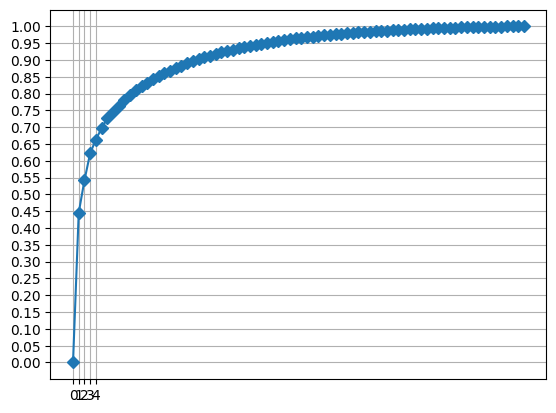

In [11]:
# 寄与率を求める
pca_col = ["PC{}".format(x + 1) for x in range(len(dfs.T.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(5))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()


           0         1         2         3         4         5         6    \
PC1   0.020186 -0.046888 -0.052068 -0.058246  0.061948 -0.044333  0.050413   
PC2  -0.075136  0.009488  0.029046 -0.012772  0.035240 -0.008107  0.082328   
PC3  -0.118892  0.021396  0.020491  0.011389  0.012701  0.039596  0.077697   
PC4  -0.141625 -0.049277 -0.015592 -0.022731 -0.110434 -0.019066 -0.029971   
PC5  -0.091967 -0.038198  0.021253 -0.017985 -0.098277 -0.021421 -0.035151   
...        ...       ...       ...       ...       ...       ...       ...   
PC75 -0.036018  0.033885 -0.034610 -0.030117  0.025374 -0.007232 -0.054053   
PC76  0.037285 -0.018221 -0.007149 -0.007624 -0.067812 -0.019034  0.007680   
PC77  0.014837 -0.173727  0.004725  0.039447 -0.037832  0.007517 -0.017527   
PC78  0.012644  0.264292  0.079222 -0.057168 -0.070353  0.122422  0.004276   
PC79  0.034065 -0.061261 -0.007322  0.007389 -0.013282  0.008961 -0.052254   

           7         8         9    ...       502       503    

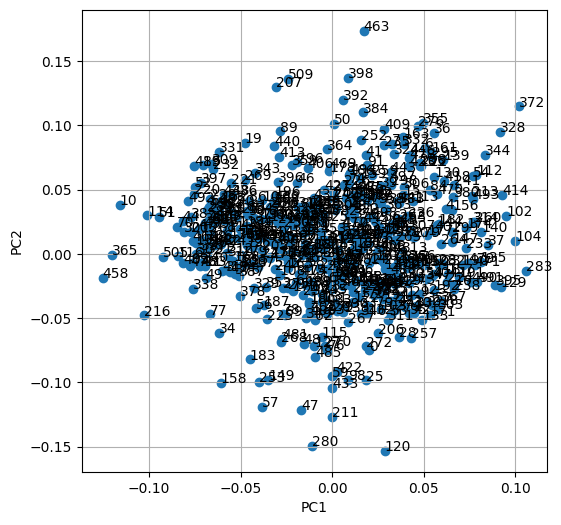

In [12]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns = pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=dfs.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], dfs.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


---

### PCA -要素分析

In [13]:
F_mean = df[df["gender"]=="F"]["maxf0[Hz]"].values.mean()
M_mean = df[df["gender"]=="M"]["maxf0[Hz]"].values.mean()
T_mean = df["maxf0[Hz]"].values.mean()

dur_mean = df["parallel100[min]"].values.mean()

In [54]:
# M max: 190~340 (275.64)
# F max: 330~480 (414.625)

# dur p100: 10.39[min]  ~ 18.24

#性別(男/女)
gender_colors = ['red' if d[1]["gender"] == "F" else 'blue' for d in df.iterrows()]

#f0(高/低)
f0_colors = []
for d in df.iterrows():
    if d[1]["maxf0[Hz]"] > T_mean:
        f0_colors.append("green")
    else:
        f0_colors.append("orange")

#性別・f0(男・高/男・低/女・高/女・低)
gender_f0_colors = []
for d in df.iterrows():
    if d[1]["gender"] == "M":
        if d[1]["maxf0[Hz]"] > M_mean:
            gender_f0_colors.append("green")
        else:
            gender_f0_colors.append("blue")
    else:
        if d[1]["maxf0[Hz]"] > F_mean:
            gender_f0_colors.append("red")
        else:
            gender_f0_colors.append("orange")   

#速度(速/遅)            
dur_colors = []
for d in df.iterrows():
    if d[1]["parallel100[min]"] > dur_mean:
        dur_colors.append("green")
    else:
        dur_colors.append("orange")
        
dur_symbol = []
dur_label = []
gender_symbol = []
gender_label = ["Man", "Woman"]

for d in df.iterrows():
    if d[1]["gender"] == "M":
        gender_symbol.append(".")
    else:
        gender_symbol.append("x")

        
    
    if d[1]["parallel100[min]"] > dur_mean:
        dur_symbol.append(",")
    else:
        dur_symbol.append("^")

In [ ]:
man = []
woman = []
for d in df.iterrows():
    if d[1]["gender"] == "F":
        woman.append

性別のみ

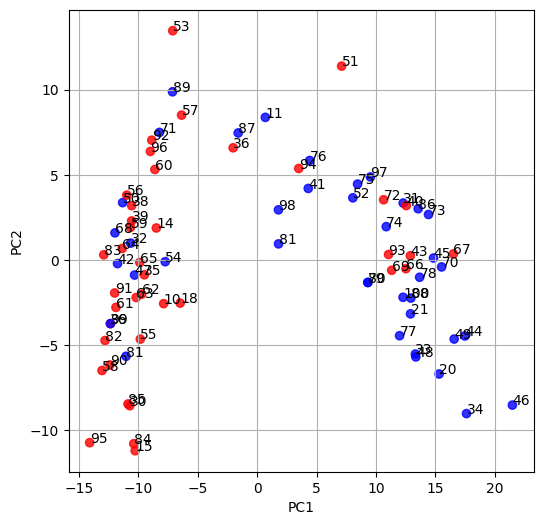

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=gender_colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()

f0のみ

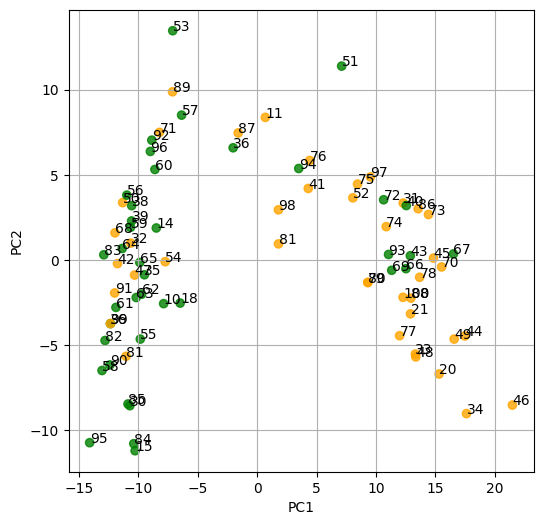

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=f0_colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()

性別，f0考慮

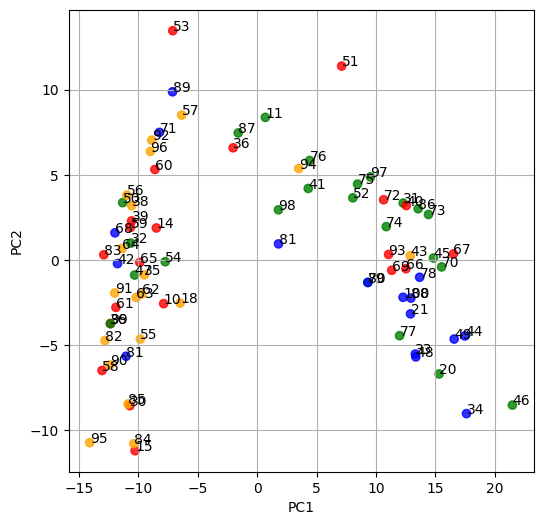

In [17]:
# 主成分得点を求める
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=gender_f0_colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()


話速のみ

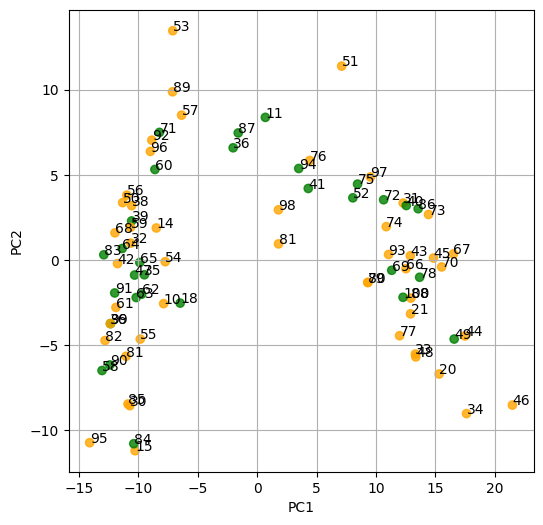

In [18]:
# 主成分得点を求める
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8,c=dur_colors)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()


---

In [19]:
df['pca1'] = pca_row[:,0]
df['pca2'] = pca_row[:,1]


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.loc[:,['id','text','pca1']].sort_values('pca1').to_string(index=False))


 id                  text       pca1
 95          20～30歳ぐらいの女性 -14.111978
 58     おっとりとした声の高いおばあちゃん -13.069649
 83              声の高い成人女性 -12.921738
 82            しっかりしたお姉さん -12.814664
 90        クールでか細い声の女子中学生 -12.414900
 99           早口な爽やかイケボ男子 -12.362446
 36       間をおいて話す明るい女子中学生 -12.362446
 91       テンションの低い気だるげな女性 -12.004030
 68              クールなおじさま -11.980148
 61              元気そうな女の子 -11.899416
 42     落ち着いた声で話す少し声の低い男性 -11.765528
 64          ゆったり話すクールな女子 -11.371265
 50        丁寧に話す声の低めのおじさん -11.334765
 81            ボーイッシュな女の子 -11.048544
 56             声の高い40代女性 -10.982393
 85            少し声の高い成人女性 -10.884212
 30      ゆっくりと活舌悪くこもり声の女性 -10.726839
 59            キリッとした声の女性 -10.676274
 32              少し声の高い男性 -10.655187
 39            少し声の高い若い女性 -10.579875
 38                中音程な女性 -10.576169
 84       キリッとした真面目そうな女の子 -10.397202
 47           70代近いおじいちゃん -10.326721
 15            20歳程度のお姉さん -10.282064
 63       きっちりした話し方の女子高校生 -10.191969
 65  40～50歳ぐらいの感情豊かなおばちゃん  -9.891240
 

In [21]:
print(df.loc[:,['id','text','pca2']].sort_values('pca2').to_string(index=False))


 id                  text       pca2
 15            20歳程度のお姉さん -11.192846
 84       キリッとした真面目そうな女の子 -10.780653
 95          20～30歳ぐらいの女性 -10.721356
 34  ゆっくり落ち着きのある低い声の５０代男性  -9.015148
 30      ゆっくりと活舌悪くこもり声の女性  -8.551620
 46          中音程の40代のおじさん  -8.514374
 85            少し声の高い成人女性  -8.449434
 20                 早口な男性  -6.690715
 58     おっとりとした声の高いおばあちゃん  -6.486117
 90        クールでか細い声の女子中学生  -6.159820
 48                声の低い男性  -5.688857
 81            ボーイッシュな女の子  -5.651041
 33             間をおいて話す男性  -5.519168
 82            しっかりしたお姉さん  -4.724654
 55             おしとやかな女の子  -4.642386
 49             低めの声のおじさん  -4.639824
 44          中音程なやさしそうな男性  -4.459590
 77             優しそうなお兄さん  -4.443687
 99           早口な爽やかイケボ男子  -3.734782
 36       間をおいて話す明るい女子中学生  -3.734782
 21     ゆっくり淡々と話す40代のおじさん  -3.161806
 61              元気そうな女の子  -2.782732
 10      おとなしく幼さを感じる女子中学生  -2.562317
 18         ゆっくり間を開けて話す女性  -2.529946
 88     やさしそうな30代ぐらいのお兄さん  -2.235348
 63       きっちりした話し方の女子高校生  -2.203578
1

### ベクトル数値分析（仮）

In [22]:
arr = np.array(vector)
max = np.max(arr)
min = np.min(arr)

print(f"max: {max}")
print(f"min: {min}")


max: 8.198106
min: -8.359719


---

### t-SNE

In [23]:
from sklearn.manifold import TSNE


In [24]:
vectors = df["vector"].tolist()
vectors = np.array(vectors)
tsne = TSNE(n_components=2)
tsne_xvector = tsne.fit_transform(vectors)

df['tsne_x'] = tsne_xvector[:,0]
df['tsne_y'] = tsne_xvector[:,1]

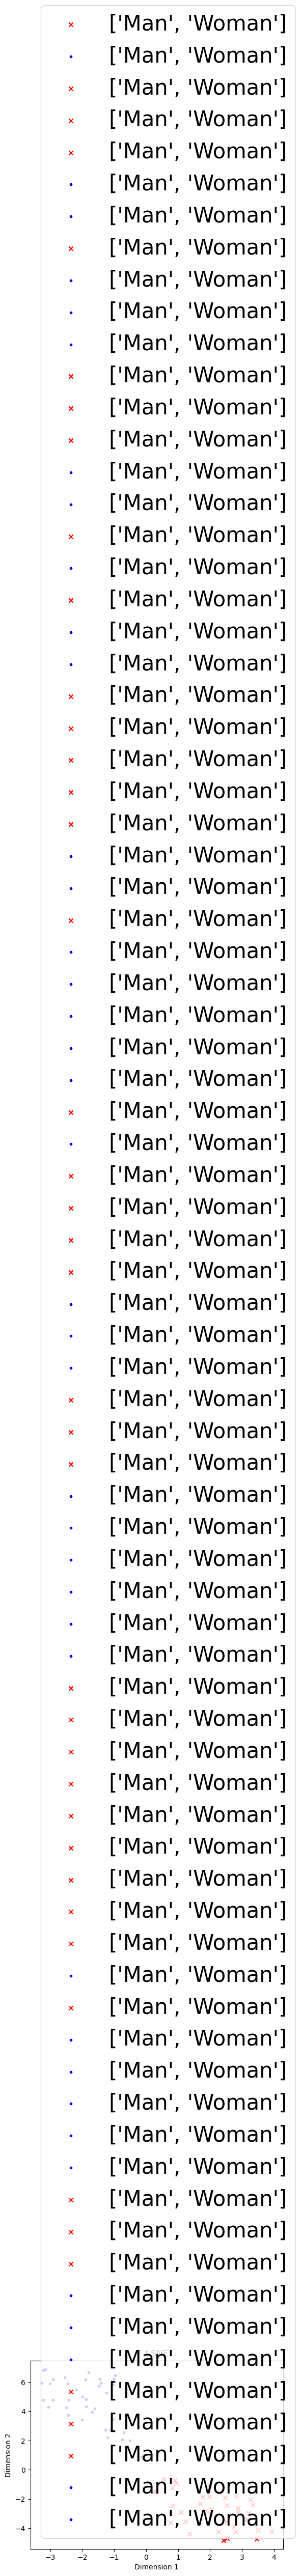

In [55]:
# 埋め込みをプロットする
for i in range(len(tsne_xvector)):
    plt.scatter(tsne_xvector[i, 0], tsne_xvector[i, 1],c=gender_colors[i], marker=gender_symbol[i])

# annotations = df['id']
# for i, label in enumerate(annotations):
#     plt.annotate(label, (tsne_xvector[i,0], tsne_xvector[i,1]))

# プロットのラベルとタイトルを設定する
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')
plt.legend()

# プロットを表示する
plt.show()


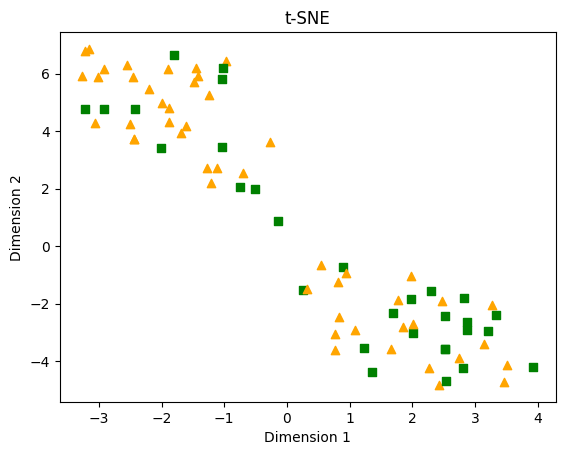

In [48]:
# 埋め込みをプロットする
for i in range(len(tsne_xvector)):
    plt.scatter(tsne_xvector[i, 0], tsne_xvector[i, 1],c=dur_colors[i], marker=dur_symbol[i])

# annotations = df['id']
# for i, label in enumerate(annotations):
#     plt.annotate(label, (tsne_xvector[i,0], tsne_xvector[i,1]))

# プロットのラベルとタイトルを設定する
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

# プロットを表示する
plt.show()

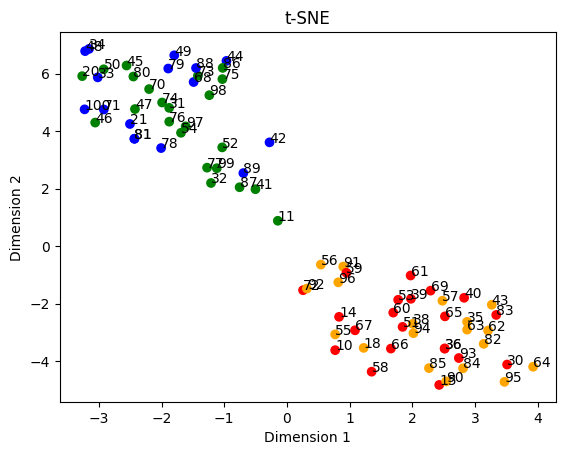

In [27]:

# 埋め込みをプロットする
plt.scatter(tsne_xvector[:, 0], tsne_xvector[:, 1],c=gender_f0_colors)

annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (tsne_xvector[i,0], tsne_xvector[i,1]))

# プロットのラベルとタイトルを設定する
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

# プロットを表示する
plt.show()

---

## speaker_similarity 比較
https://sython.org/papers/SIG-SLP/takamichi1910slp_jvs.pdf

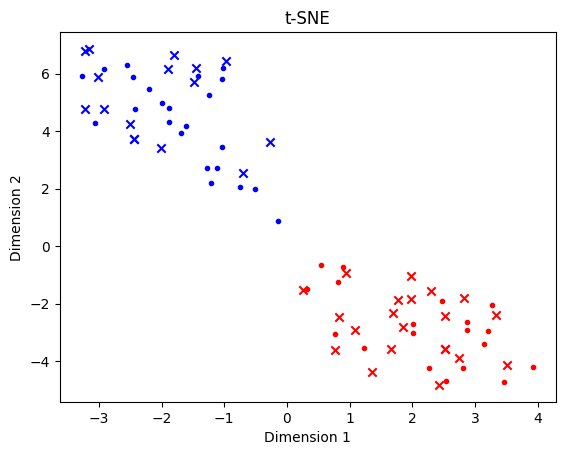

In [34]:
gender_f0_symbols = []
gender_f0_colors = []
for d in df.iterrows():
    if d[1]["gender"] == "M":
        if d[1]["maxf0[Hz]"] > M_mean:
            gender_f0_symbols.append(".")  # Mの場合は円形の記号を使用
            gender_f0_colors.append("blue")
        else:
            gender_f0_symbols.append("x")
            gender_f0_colors.append("blue")
    else:
        if d[1]["maxf0[Hz]"] > F_mean:
            gender_f0_symbols.append("x")  # Fの場合はXの記号を使用
            gender_f0_colors.append("red")
        else:
            gender_f0_symbols.append(".")
            gender_f0_colors.append("red")   
# 埋め込みをプロットする
for i in range(len(gender_f0_colors)):
    # plt.scatter(tsne_xvector[:, 0], tsne_xvector[:, 1], c=gender_f0_colors, marker=gender_f0_symbols)
    plt.scatter(tsne_xvector[i,0], tsne_xvector[i,1], c=gender_f0_colors[i], marker=gender_f0_symbols[i])

# annotations = df['id']
# for i, label in enumerate(annotations):
#     plt.annotate(label, (tsne_xvector[i,0], tsne_xvector[i,1]))

# プロットのラベルとタイトルを設定する
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

# プロットを表示する
plt.show()

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
df_corpus_sim_f = pd.read_csv("/autofs/diamond2/share/corpus/JVS/jvs_ver1/speaker_similarity_female.csv")
df_corpus_sim_m = pd.read_csv("/autofs/diamond2/share/corpus/JVS/jvs_ver1/speaker_similarity_male.csv")

In [ ]:
corpus_sim_f = df_corpus_sim_f.iloc[:,1:].values
corpus_sim_f.shape

(50, 51)

<Axes: >

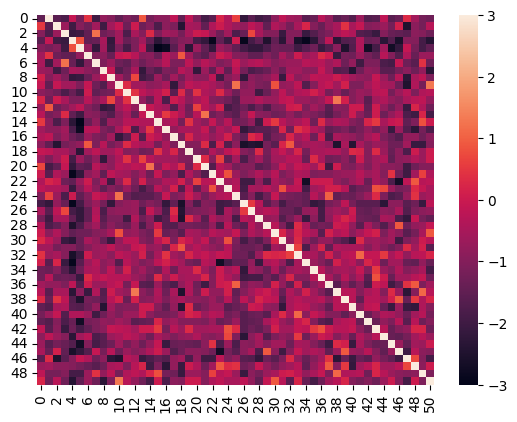

In [ ]:
plt.figure()
sns.heatmap(corpus_sim_f)
# plt.savefig('data/dst/seaborn_heatmap_ndarray.png')